# Grupo 20: Thiago e Gabriele

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import preprocessing
from sklearn import cluster


In [78]:
df = pd.read_csv('trabalho5_dados_20.csv')

In [79]:
df

area   perimetro  maior-eixo  menor-eixo  arredondamento  area-convexa  \
0      9669  388.606995  151.438461   83.590904        0.833858         10012   
1     12975  463.851013  196.423965   85.064117        0.901363         13358   
2     15161  498.790985  208.252045   93.860260        0.892673         15541   
3     11793  417.160004  163.043839   93.501099        0.819225         12022   
4     14960  482.140015  199.543976   96.218201        0.876066         15149   
...     ...         ...         ...         ...             ...           ...   
1138  13315  476.203003  205.188614   83.061020        0.914404         13510   
1139  13002  472.473999  198.077271   85.799171        0.901317         13432   
1140  10412  408.720001  163.752914   82.414291        0.864121         10735   
1141  12331  441.440002  175.609924   90.825432        0.855865         12617   
1142  10767  428.351990  181.782303   75.896065        0.908672         11002   

      extensao  
0     0.733890  
1     0.609126  
2     0.640570  
3     0.661710  
4     0.611861  
...        ...  
1138  0.551574  
1139  0.694737  
1140  0.689308  
1141  0.619399  
1142  0.699156  

[1143 rows x 7 columns]

In [80]:
df.describe()

area    perimetro   maior-eixo   menor-eixo  arredondamento  \
count   1143.000000  1143.000000  1143.000000  1143.000000     1143.000000   
mean   12658.894138   454.498840   189.051254    86.121164        0.887839   
std     1744.694334    35.739101    17.554676     5.631057        0.020007   
min     8501.000000   371.024994   151.438461    67.695343        0.816083   
25%    11353.000000   425.818008   174.266548    82.645897        0.874126   
50%    12405.000000   448.839996   186.107849    86.146309        0.890264   
75%    13959.000000   483.822495   203.602448    90.012150        0.903069   
max    17856.000000   548.445984   239.010498   102.901276        0.948007   

       area-convexa     extensao  
count   1143.000000  1143.000000  
mean   12945.679790     0.658682  
std     1786.314499     0.077419  
min     8738.000000     0.497413  
25%    11615.500000     0.597611  
50%    12659.000000     0.638173  
75%    14283.000000     0.721851  
max    18062.000000     0.861050

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            1143 non-null   int64  
 1   perimetro       1143 non-null   float64
 2   maior-eixo      1143 non-null   float64
 3   menor-eixo      1143 non-null   float64
 4   arredondamento  1143 non-null   float64
 5   area-convexa    1143 non-null   int64  
 6   extensao        1143 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 62.6 KB


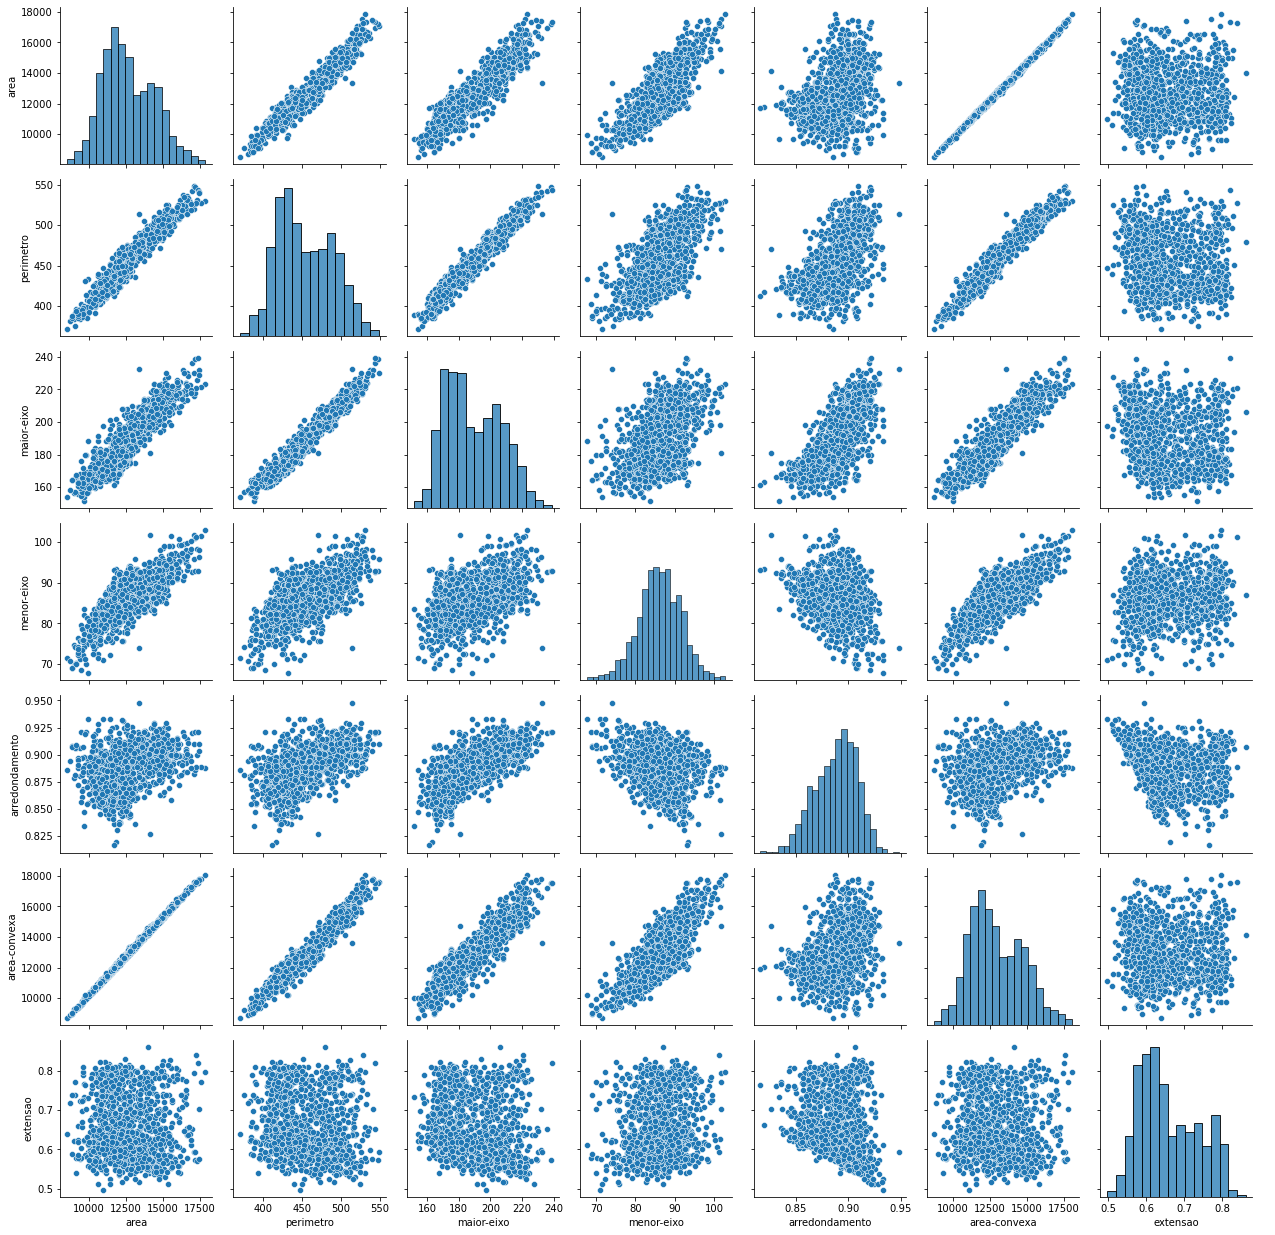

In [82]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [83]:
df.corr()

area  perimetro  maior-eixo  menor-eixo  arredondamento  \
area            1.000000   0.967621    0.910016    0.797172        0.374845   
perimetro       0.967621   1.000000    0.974633    0.644938        0.561282   
maior-eixo      0.910016   0.974633    1.000000    0.480290        0.716767   
menor-eixo      0.797172   0.644938    0.480290    1.000000       -0.253445   
arredondamento  0.374845   0.561282    0.716767   -0.253445        1.000000   
area-convexa    0.998988   0.971151    0.910753    0.796271        0.376175   
extensao       -0.029267  -0.103465   -0.118685    0.098955       -0.206128   

                area-convexa  extensao  
area                0.998988 -0.029267  
perimetro           0.971151 -0.103465  
maior-eixo          0.910753 -0.118685  
menor-eixo          0.796271  0.098955  
arredondamento      0.376175 -0.206128  
area-convexa        1.000000 -0.033563  
extensao           -0.033563  1.000000

In [84]:
df.shape

(1143, 7)

## Aplicando o PCA


Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data. The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. 

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_reduced= pca.fit_transform(df)
X_reduced.shape

(1143, 3)

In [86]:
display(X_reduced)

array([[-4.18850269e+03,  8.85787004e+01, -1.74865163e+01],
       [ 5.15955880e+02,  6.20113232e+01,  2.17235677e+00],
       [ 3.60527595e+03,  2.30319750e+01, -7.91076124e+00],
       ...,
       [-3.15189000e+03,  6.25736604e+01, -7.82921379e+00],
       [-4.64446001e+02,  4.50357113e+00, -1.31591685e+01],
       [-2.71251014e+03, -3.95201822e+00,  1.63786088e+01]])

### Normalizando

In [87]:
scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
x_norm = scaler.fit_transform(df)

### Método Elbow

In [128]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = cluster.KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

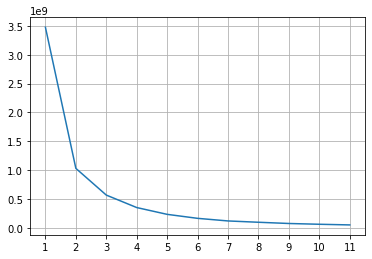

In [136]:
teste= calculate_WSS(df.values,11)
plt.plot(np.arange(1,12),teste)
plt.xticks(np.arange(1,12))
plt.grid()
plt.show()

## K-means

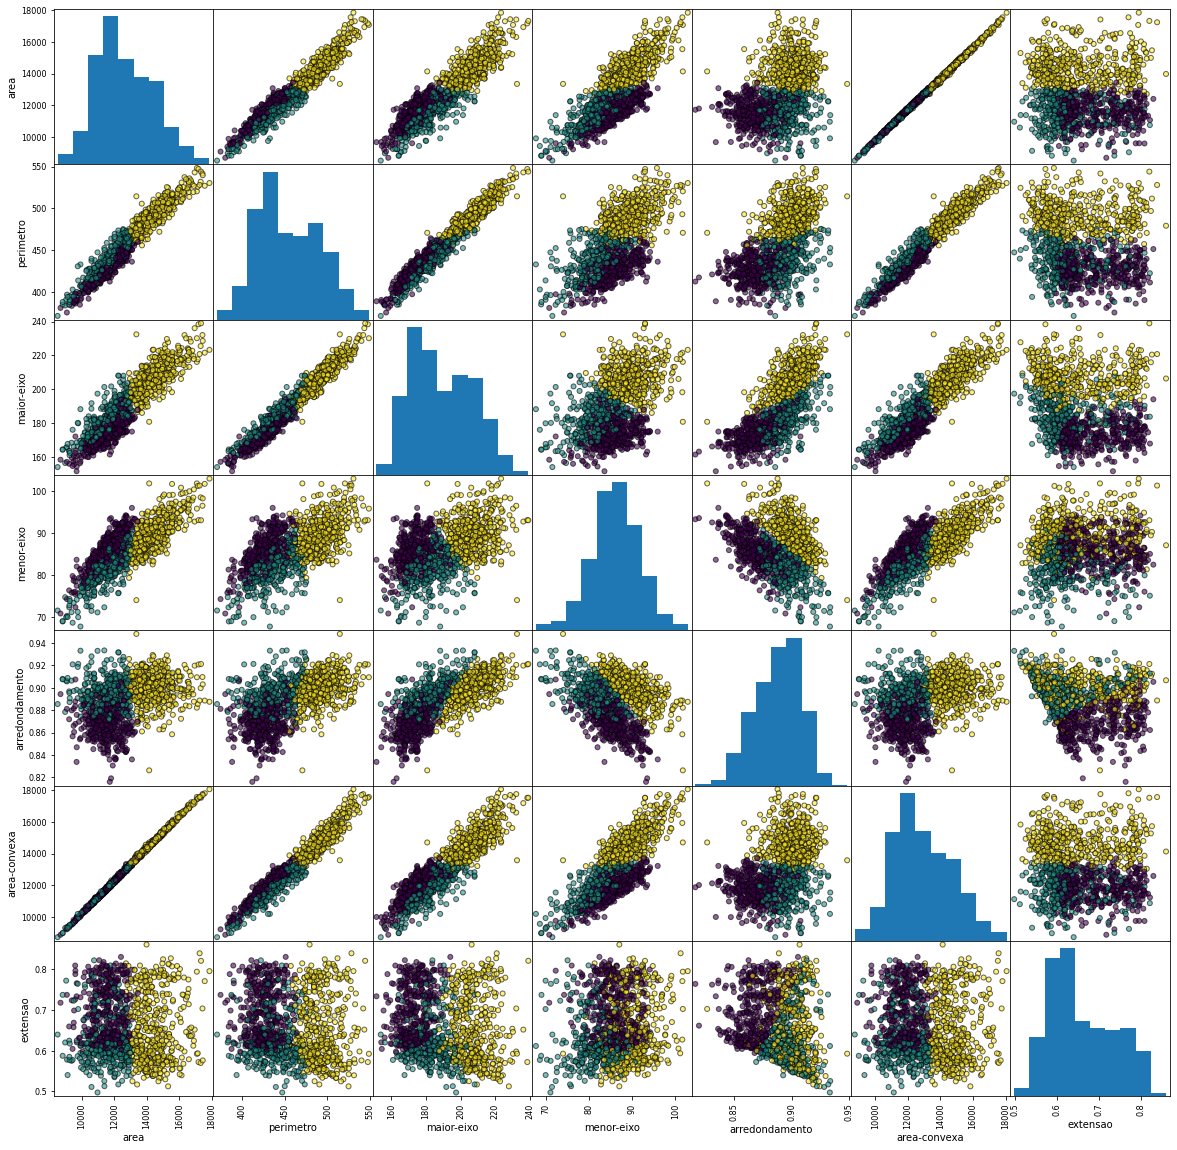

In [137]:

kmeans = cluster.MiniBatchKMeans( n_clusters=3, batch_size=10)
y_kmeans = kmeans.fit_predict(x_norm)


pd.plotting.scatter_matrix(df,marker="o", c=y_kmeans, s=25, edgecolor="k" , alpha=0.6,figsize=(20,20))
plt.show()

In [138]:
set(kmeans.labels_)

{0, 1, 2}

## Optics

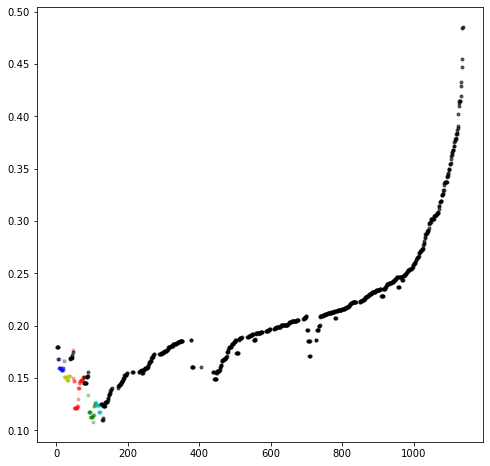

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, -1}


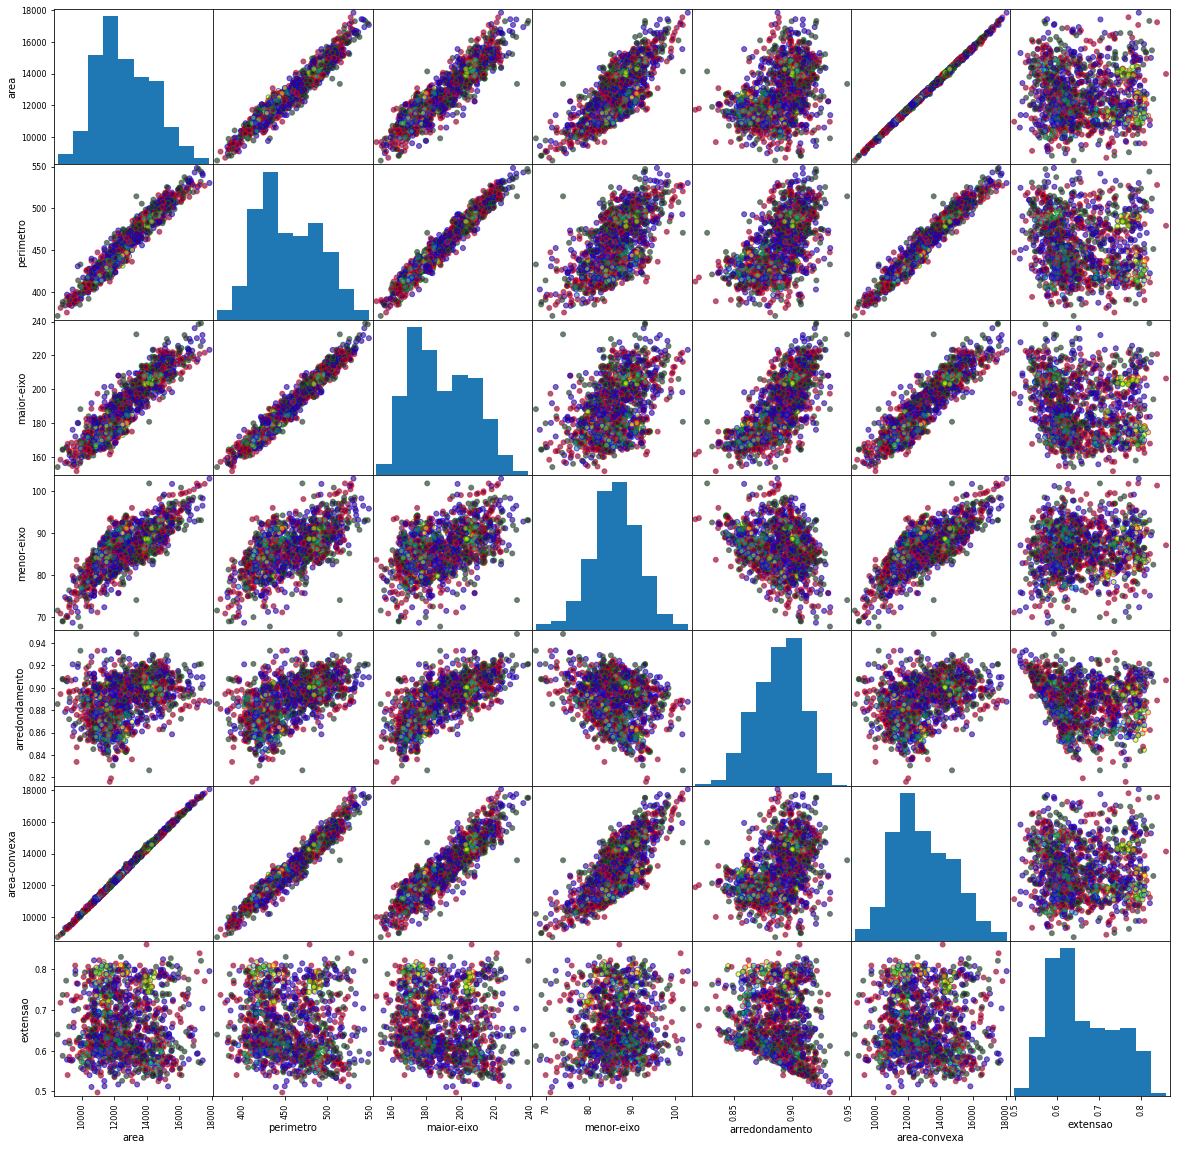

In [214]:
modelo = cluster.OPTICS( 
    min_samples=10, max_eps=0.5, 
    xi=0.0009
    
)
y_predito = modelo.fit_predict(x_norm)

#####
space = np.arange(len(x_norm))
reachability = modelo.reachability_[ modelo.ordering_ ]
labels = modelo.labels_[ modelo.ordering_ ]

plt.figure(figsize=(8,8))
colors = [ "b.", "y.", "r.", "g.", "c." ]
for klass, color in zip( range(0, 5), colors ):
  Xk = space[ labels == klass ]
  Rk = reachability[ labels==klass ]
  plt.plot(Xk, Rk, color, alpha=0.3)

plt.plot( space[ labels == -1 ], reachability[ labels==-1 ], "k.", alpha=0.6 )

plt.show()
print(set(modelo.labels_[ modelo.ordering_ ]))

########
pd.plotting.scatter_matrix(df,marker="o", c=y_predito, s=25, edgecolor=['r','g','b'], alpha=0.6,figsize=(20,20))
plt.show()

In [179]:
set(modelo.labels_[ modelo.ordering_ ])

{-1, 0, 1}

## DBScan

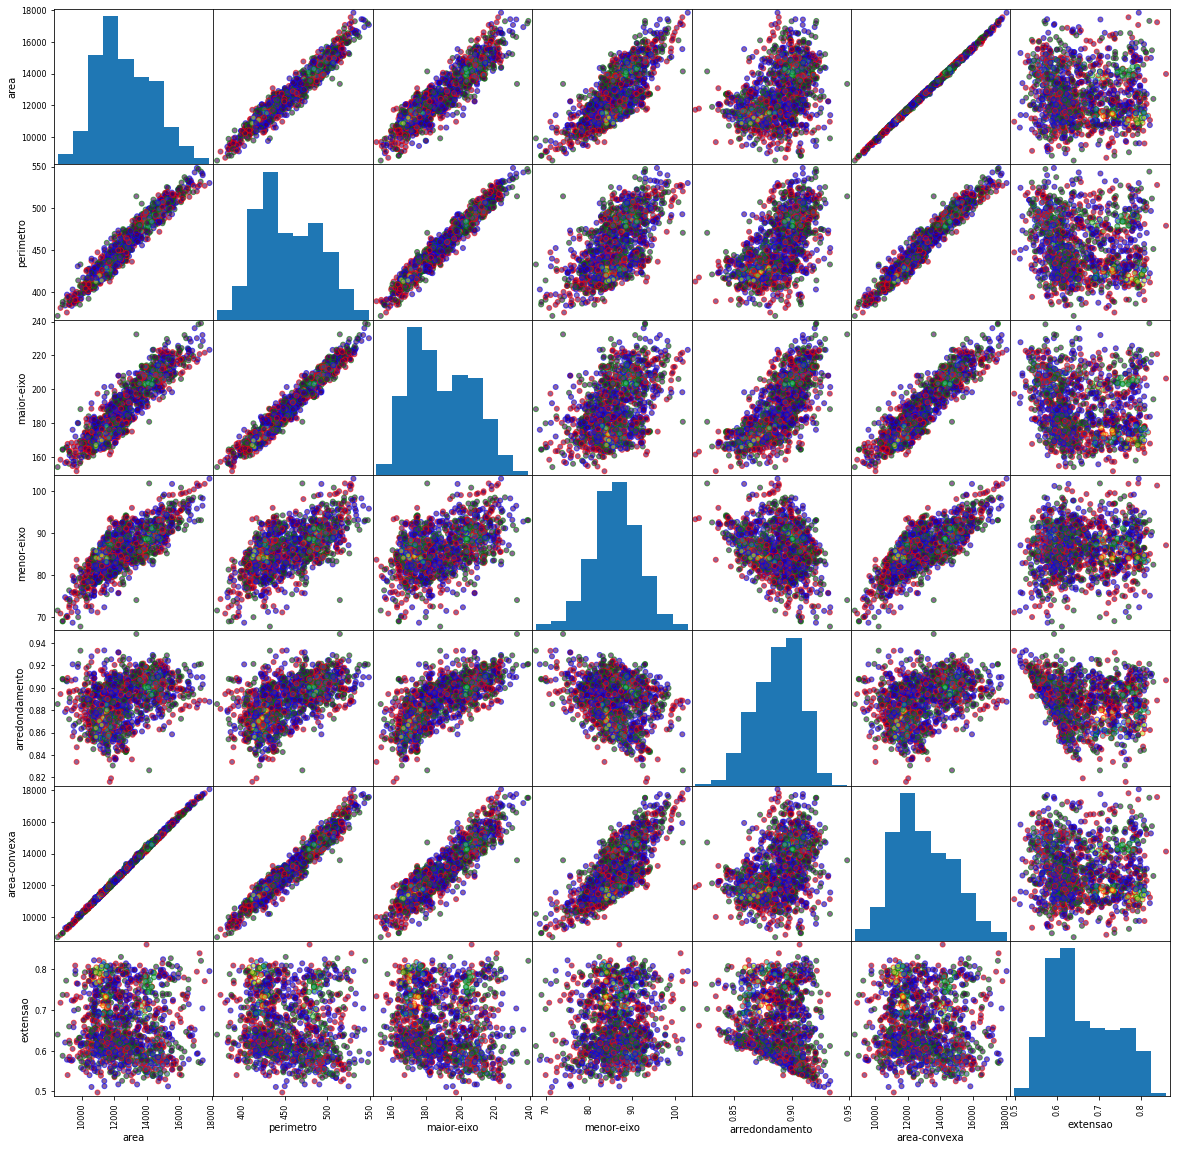

In [188]:
modelo = cluster.DBSCAN( eps=0.18, min_samples=10)

y_predito = modelo.fit_predict(x_norm)


pd.plotting.scatter_matrix(df,marker="o", c=y_predito, s=25, edgecolor=['r','g','b'], alpha=0.6,figsize=(20,20))
plt.show()